# __<font color="orange">E-Commerce  </font>__
###  <font color="grey"> Customer Transaction & Behaviour Analysis

## Project Introduction
#### Title: E-Commerce Customer Transaction & Behaviour Analysis This project focuses on analyzing a multi-dimensional e-commerce dataset to understand customer purchasing patterns, delivery performance, and financial metrics. In real-world business environments, data is often siloed across different departments (Customers, Orders, Payments, etc.). The primary goal of this analysis is to unify these disparate data sources into a single, comprehensive dataset to drive data-driven decision-making and strategic business improvements.

## Project Explanation
### The analysis follows a structured lifecycle:

#### Data Integration: Merging multiple relational tables (Customers, Geolocation, Orders, Items, Payments, Reviews, and Products) to create a "Golden Dataset".

#### Data Cleaning & Familiarization: Correcting data types for timestamps and monetary values, handling missing review scores, and calculating delivery performance metrics.

#### Feature Engineering: Creating new variables such as Total Order Value, Delivery Delay Days, and Customer Lifetime Revenue to deepen the analysis.

#### Performance Tracking: Assessing delivery efficiency by comparing actual vs. estimated delivery dates and identifying outliers in pricing and freight costs.

###  <font color="grey">   Importing required libraries. 


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


pd.set_option("display.max_columns",None)


#  <font color="grey"> Load all CSV files

In [ ]:
customers = pd.read_csv("customers.csv")
geolocation = pd.read_csv("geolocation.csv")
order_items = pd.read_csv("order_items.csv")
order_payments = pd.read_csv("order_payments.csv")
order_reviews = pd.read_csv("order_reviews.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
sellers = pd.read_csv("sellers.csv")
product_category_name_translation = pd.read_csv(
    "product_category_name_translation.csv"
)

In [74]:
# City wise total order amount   [  city    -  Order Amount  ]
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [75]:
# Checking Geolocation Table 
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [76]:
# Checking dups.. 
geolocation.duplicated().sum()


np.int64(261831)

In [77]:
# Checking Geolocation for a single zipcode...
geolocation[geolocation["geolocation_zip_code_prefix"]== 99965]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999754,99965,-28.173892,-52.038447,agua santa,RS
999755,99965,-28.178429,-52.035260,agua santa,RS
999933,99965,-28.210845,-52.059927,agua santa,RS
999949,99965,-28.181715,-52.035593,agua santa,RS
1000067,99965,-28.174697,-52.035508,agua santa,RS
1000155,99965,-28.180655,-52.034367,agua santa,RS


# Multiple rows for a single Geolocation is there. So it should be aggregate 
# else it will create multiple rows while merging. 

#### Data Integrity & Duplication: Initial exploration revealed significant duplication in geolocation data (over 260,000 duplicates), necessitating aggregation to prevent data inflation during merges.

In [78]:
# Creating new aggregated dataset 

geo = geolocation.groupby("geolocation_zip_code_prefix").agg({
    "geolocation_lat": "mean",
    "geolocation_lng": "mean",
    "geolocation_city": "first",
    "geolocation_state": "first"
}).reset_index()
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP
...,...,...,...,...,...
19010,99960,-27.953722,-52.025511,charrua,RS
19011,99965,-28.183372,-52.039850,agua santa,RS
19012,99970,-28.343766,-51.874689,ciriaco,RS
19013,99980,-28.389129,-51.843836,david canabarro,RS


In [79]:
geo[geo["geolocation_zip_code_prefix"]== 99965]


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
19011,99965,-28.183372,-52.03985,agua santa,RS


## merging the dataset

In [80]:
# Merge rders with Customers

df = orders.merge(customers, on="customer_id", how="left")
# Left means - 
# Keep all orders, even if customer info is missing.”





# Add Customer Location
df = df.merge(
    geo,
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
)
# Now each order has location information.




# Add Order Items (Products in Orders)
df = df.merge(order_items, on="order_id", how="left")



# Add Payment Information
df = df.merge(order_payments, on="order_id", how="left")

# Now we know:
# 	•	How customers paid
# 	•	How much they paid




# Add Reviews (Ratings)
df = df.merge(order_reviews, on="order_id", how="left")
# Now we can analyze:
# 	•	Ratings
# 	•	Customer satisfaction





# Add Product Details
df = df.merge(products, on="product_id", how="left")

# Now we know:
	# •	Product category
	# •	Size & weight information



# Add English Product Category Names
df = df.merge(
    product_category_name_translation,
    on="product_category_name",
    how="left"
)



#  Add Seller Information
df = df.merge(sellers, on="seller_id", how="left")



df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.177924,-44.660711,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.745150,-48.514783,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [81]:


df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.177924,-44.660711,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.745150,-48.514783,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [82]:
df.describe()

,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,119143.000000,118821.000000,118821.000000,118821.000000,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000
mean,35033.451298,34955.424125,-21.230187,-46.191214,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413
std,29823.198969,29809.673053,5.564179,4.042785,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511
min,1003.000000,1003.000000,-33.689948,-72.668881,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11250.000000,11089.000000,-23.589488,-48.097776,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24240.000000,24230.000000,-22.928413,-46.631239,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58475.000000,58187.000000,-20.180863,-43.608100,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000
max,99990.000000,99990.000000,42.184003,-8.723762,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


## checking null values in percentage

In [ ]:
df.isnull().sum()/len(df)*100

## Phase 1: Data Familiarisation & Cleaning

#### Tasks Performed
#### Understanding table relationships and joins
#### Data type correction:

#### Timestamps
#### Monetary values
#### handling missing data 


### timestamp datatype correction


In [83]:
timestamp_cols = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]
for cols in timestamp_cols:
    df[cols]=pd.to_datetime(df[cols])
    
print(df[timestamp_cols].dtypes)

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
shipping_limit_date              datetime64[ns]
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
dtype: object


monetary value correction

### datatype correction

In [84]:
df["customer_unique_id"]

0         7c396fd4830fd04220f754e42b4e5bff
1         7c396fd4830fd04220f754e42b4e5bff
2         7c396fd4830fd04220f754e42b4e5bff
3         af07308b275d755c9edb36a90c618231
4         3a653a41f6f9fc3d2a113cf8398680e8
                        ...               
119138    da62f9e57a76d978d02ab5362c509660
119139    737520a9aad80b3fbbdad19b66b37b30
119140    5097a5312c8b157bb7be58ae360ef43c
119141    5097a5312c8b157bb7be58ae360ef43c
119142    60350aa974b26ff12caad89e55993bd6
Name: customer_unique_id, Length: 119143, dtype: object

## monetry values

In [85]:
monetary_cols = ['price', 'freight_value', 'payment_value']
for col in monetary_cols:
    df[col]=pd.to_numeric(df[col], errors='coerce')
print(df[monetary_cols].dtypes)


price            float64
freight_value    float64
payment_value    float64
dtype: object


Recruiters look for these corrections as a signal of real-world data preparation skills.

### missing reviews 

In [86]:
print(f"Missing Review Scores: {df['review_score'].isnull().sum()}")

df['review_score']=df['review_score'].fillna(0)

Missing Review Scores: 997


### missing delivery dates

In [87]:
print(f"Missing Delivery Dates: {df['order_delivered_customer_date'].isnull().sum()}")

Missing Delivery Dates: 3421


In [88]:
##  dropping nulls from order_delivered_customer_date 
delivered_orders = df.dropna(subset=['order_delivered_customer_date'])
delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.177924,-44.660711,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.745150,-48.514783,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-

## duplicate order item 

In [90]:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")
df = df.drop_duplicates()


Total duplicate rows: 0


delivery delay actual vs estimeted

#### Delivery Performance: By calculating delivery_delay_days, we can categorize orders as "On-time" or "Delayed". Most orders in the sample dataset were delivered on time, with some appearing significantly ahead of schedule.

In [91]:
x=df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
x

0         -8.0
1         -8.0
2         -8.0
3         -6.0
4        -18.0
          ... 
119138    -2.0
119139    -6.0
119140   -21.0
119141   -21.0
119142   -18.0
Length: 119143, dtype: float64

In [92]:
y=df['delivery_status'] = df['delivery_delay_days'].apply(lambda x: 'Delayed' if x > 0 else 'On-time')
y

0         On-time
1         On-time
2         On-time
3         On-time
4         On-time
           ...   
119138    On-time
119139    On-time
119140    On-time
119141    On-time
119142    On-time
Name: delivery_delay_days, Length: 119143, dtype: object

## detecting outliers in price , freight_value,payment_value

#### Financial Distribution: Analysis of price, freight_value, and payment_value showed that approximately 7% to 10% of entries are statistical outliers, indicating a wide range of product values and shipping costs that may require separate strategic handling.

In [93]:

cols = ['price', 'freight_value', 'payment_value']

outlier_results = []

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    
    outlier_results.append({
        'Feature': col,
        'Lower Bound': lower_limit,
        'Upper Bound': upper_limit,
        'Outlier Count': len(outliers),
        'Percentage': (len(outliers) / len(df)) * 100
    })


outlier_summary = pd.DataFrame(outlier_results)
print(outlier_summary)

         Feature  Lower Bound  Upper Bound  Outlier Count  Percentage
0          price     -102.600      277.400           8867    7.442317
1  freight_value        0.930       33.330          12740   10.693033
2  payment_value     -131.735      381.825           9638    8.089439


## total order value
#### the money the customer pays for shipping and taxes.

In [94]:
p=df['Total Order Value']=df['price']+ df['freight_value']
p

0          38.71
1          38.71
2          38.71
3         141.46
4         179.12
           ...  
119138    195.00
119139    271.01
119140    220.58
119141    220.58
119142     86.86
Length: 119143, dtype: float64

## customer lifetime revenue
#### the total amount of money a customer will spend with you as long as they remain a customer.

In [95]:
customer_revenue = df.groupby('customer_unique_id').agg({
    'order_id':'nunique',
    'Total Order Value':'sum'
}).rename(columns={'order_id': 'purchase_frequency', 'Total Order Value': 'lifetime_revenue'})
customer_revenue 

,purchase_frequency,lifetime_revenue
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19
0000f46a3911fa3c0805444483337064,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,43.62
0004aac84e0df4da2b147fca70cf8255,1,196.89
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42
fffea47cd6d3cc0a88bd621562a9d061,1,84.58
ffff371b4d645b6ecea244b27531430a,1,112.46


In [96]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,delivery_delay_days,delivery_status,Total Order Value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-8.0,On-time,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-8.0,On-time,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-8.0,On-time,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.177924,-44.660711,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP,-6.0,On-time,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.745150,-48.514783,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP,-18.0,On-time,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## delivery delay 
#### when a package or service does not reach the customer within the timeframe originally promised or expected.

In [97]:
x=df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
x



0         -8.0
1         -8.0
2         -8.0
3         -6.0
4        -18.0
          ... 
119138    -2.0
119139    -6.0
119140   -21.0
119141   -21.0
119142   -18.0
Length: 119143, dtype: float64

In [98]:
z=df['delivery_performance'] = df['delivery_delay'].apply(lambda x: 'Delayed' if x > 0 else 'On-time')
z

0         On-time
1         On-time
2         On-time
3         On-time
4         On-time
           ...   
119138    On-time
119139    On-time
119140    On-time
119141    On-time
119142    On-time
Name: delivery_delay, Length: 119143, dtype: object

In [99]:

s=df['order_month'] = df['order_purchase_timestamp'].dt.month

s

0         10
1         10
2         10
3          7
4          8
          ..
119138     2
119139     8
119140     1
119141     1
119142     3
Name: order_purchase_timestamp, Length: 119143, dtype: int32

In [100]:
x=df['order_year'] = df['order_purchase_timestamp'].dt.year
x

0         2017
1         2017
2         2017
3         2018
4         2018
          ... 
119138    2018
119139    2017
119140    2018
119141    2018
119142    2018
Name: order_purchase_timestamp, Length: 119143, dtype: int32

In [101]:
z=df['order_month_year'] = df['order_purchase_timestamp'].dt.to_period('M')
z

0         2017-10
1         2017-10
2         2017-10
3         2018-07
4         2018-08
           ...   
119138    2018-02
119139    2017-08
119140    2018-01
119141    2018-01
119142    2018-03
Name: order_purchase_timestamp, Length: 119143, dtype: period[M]

In [102]:
df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,delivery_delay_days,delivery_status,Total Order Value,delivery_delay,delivery_performance,order_month,order_year,order_month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-8.0,On-time,38.71,-8.0,On-time,10,2017,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,-8.0,On-time,38.71,-8.0,On-time,10,2017,2017-10


## customer analysis




In [103]:
customer_count=df.groupby("customer_unique_id").agg({
    'order_id':'nunique',
    'payment_value':'sum'
})
customer_count

,order_id,payment_value
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19
0000f46a3911fa3c0805444483337064,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,43.62
0004aac84e0df4da2b147fca70cf8255,1,196.89
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,4134.84
fffea47cd6d3cc0a88bd621562a9d061,1,84.58
ffff371b4d645b6ecea244b27531430a,1,112.46


### avg freight value

In [104]:
avg_freight = df['freight_value'].mean()
avg_freight

np.float64(20.0323865269208)

## purchase frequency distribution
#### that shows how many customers have made a specific number of purchases over a set period.

In [105]:

purchase_freq = df.groupby('customer_unique_id')['order_id'].nunique().value_counts().reset_index()
purchase_freq.columns = ['number_of_orders', 'customer_count']


purchase_freq['percentage'] = (purchase_freq['customer_count'] / purchase_freq['customer_count'].sum()) * 100

print("Purchase Frequency Distribution:")
print(purchase_freq)

Purchase Frequency Distribution:
   number_of_orders  customer_count  percentage
0                 1           93099   96.881244
1                 2            2745    2.856518
2                 3             203    0.211247
3                 4              30    0.031219
4                 5               8    0.008325
5                 6               6    0.006244
6                 7               3    0.003122
7                 9               1    0.001041
8                17               1    0.001041


## Product & Category Analysis
#### It is the process of evaluating which specific items or groups of items are driving your Total Order Value (TOV) and which ones are dragging down your margins.

In [106]:
# Aggregate by Category
cat_analysis = df.groupby('product_category_name_english').agg({
    'order_id': 'nunique',        # Order Volume
    'price': 'sum',              # Revenue
    'review_score': 'mean'       # Quality Metric
}).reset_index()

# Rename columns for clarity
cat_analysis.columns = ['category', 'order_volume', 'revenue', 'avg_review_score']

# Calculate Category Contribution %
total_revenue = cat_analysis['revenue'].sum()
cat_analysis['revenue_contribution_%'] = (cat_analysis['revenue'] / total_revenue) * 100

# Top 5 Categories by Revenue
top_5_rev = cat_analysis.sort_values(by='revenue', ascending=False).head(5)
print("Top 5 Revenue Drivers:\n", top_5_rev)

Top 5 Revenue Drivers:
                  category  order_volume     revenue  avg_review_score  \
43          health_beauty          8836  1301947.97          4.101974   
70          watches_gifts          5624  1254322.95          3.984066   
7          bed_bath_table          9417  1107249.09          3.844845   
65         sports_leisure          7720  1029603.88          4.079187   
15  computers_accessories          6689   950053.69          3.914356   

    revenue_contribution_%  
43                9.249293  
70                8.910956  
7                 7.866114  
65                7.314507  
15                6.749367  


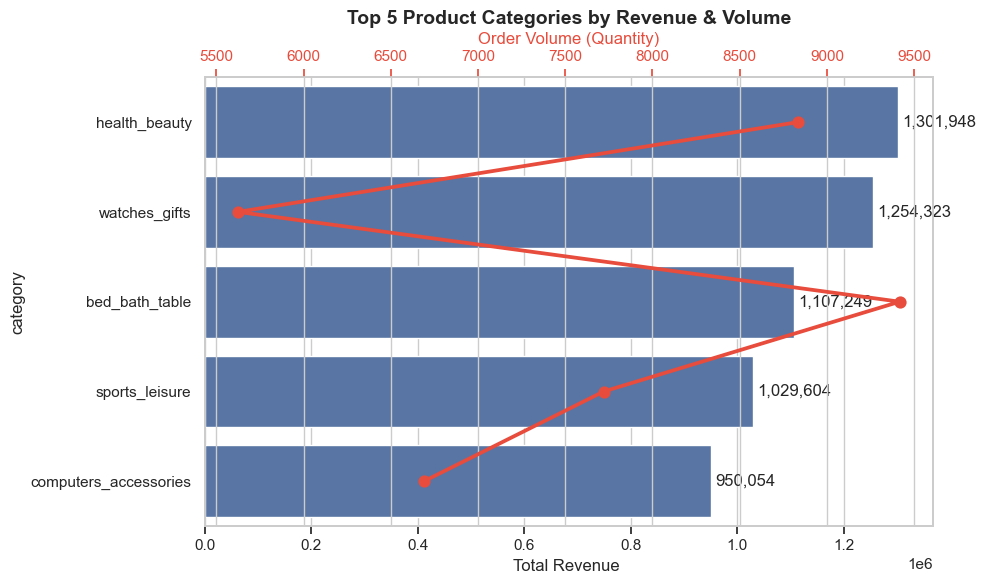

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Revenue
sns.barplot(data=top_5_rev, x='revenue', y='category')
ax1.set_title('Top 5 Product Categories by Revenue & Volume', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Revenue ', fontsize=12)

# Add Revenue labels
for i in ax1.containers:
    ax1.bar_label(i, fmt='{:,.0f}', padding=3)

# Line chart for Order Volume on a twin axis (Top Axis)
ax2 = ax1.twiny()
sns.pointplot(data=top_5_rev, x='order_volume', y='category', color='#e74c3c', markers='o', ax=ax2)
ax2.set_xlabel('Order Volume (Quantity)', fontsize=12, color='#e74c3c')
ax2.tick_params(axis='x', colors='#e74c3c')

plt.tight_layout()
plt.show()

### product_category and their payment_value with review_score


In [108]:
product_cat=df.groupby("product_category_name_english").agg({
    'order_id': 'nunique',      
    'payment_value': 'sum',      
    'review_score': 'mean'       
    
})
product_cat

,order_id,payment_value,review_score
product_category_name_english,,,
agro_industry_and_commerce,182,118730.61,4.150794
air_conditioning,253,91170.66,3.903974
art,202,30992.93,3.899543
arts_and_craftmanship,23,2326.17,4.125000
audio,350,60388.62,3.800525
...,...,...,...
stationery,2311,318105.09,4.159619
tablets_printing_image,79,10042.93,4.022989
telephony,4199,487189.71,3.920440


## avg rating

In [109]:
avg_marketplace_rating = product_cat['review_score'].mean()
avg_marketplace_rating


np.float64(3.998976157525848)

#### avg rating of product is 4.0

## C. Sales & Revenue Analysis


### montly and yearly analysis

In [110]:
monthly_revenue = df.set_index('order_purchase_timestamp')['payment_value'].resample('MS').sum().reset_index().sort_values(by="order_purchase_timestamp",ascending=True)
monthly_revenue

,order_purchase_timestamp,payment_value
0,2016-09-01,388.47
1,2016-10-01,76559.05
2,2016-11-01,0.00
3,2016-12-01,19.62
4,2017-01-01,190806.27
5,2017-02-01,351848.13
6,2017-03-01,547769.84
7,2017-04-01,512126.52
8,2017-05-01,737425.31
9,2017-06-01,613777.41


## Revenue Growth

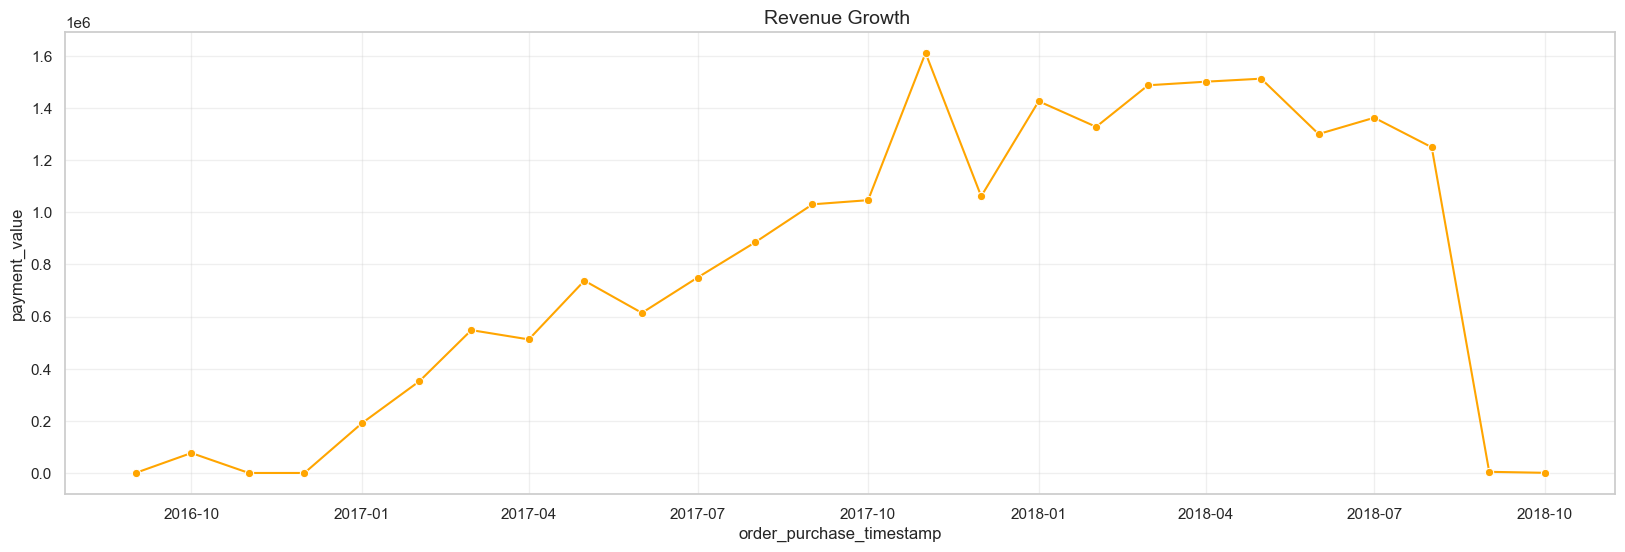

In [111]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=monthly_revenue, x='order_purchase_timestamp', y='payment_value', marker='o', color='orange')
plt.title('Revenue Growth ', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()



In [112]:
state_rev = df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).reset_index()
state_rev.head(10)


,customer_state,payment_value
0,SP,7726078.35
1,RJ,2795615.67
2,MG,2351221.09
3,RS,1160175.66
4,PR,1079795.49
5,BA,805070.98
6,SC,801276.45
7,GO,520481.65
8,DF,438095.32
9,ES,408611.64


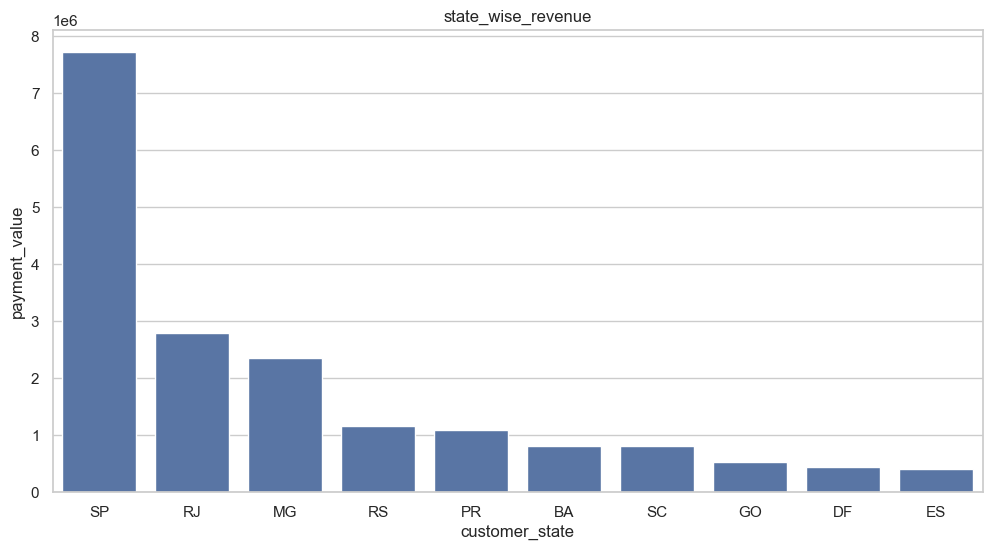

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(data=state_rev.head(10),x='customer_state',y='payment_value')
plt.title("state_wise_revenue")
plt.show()

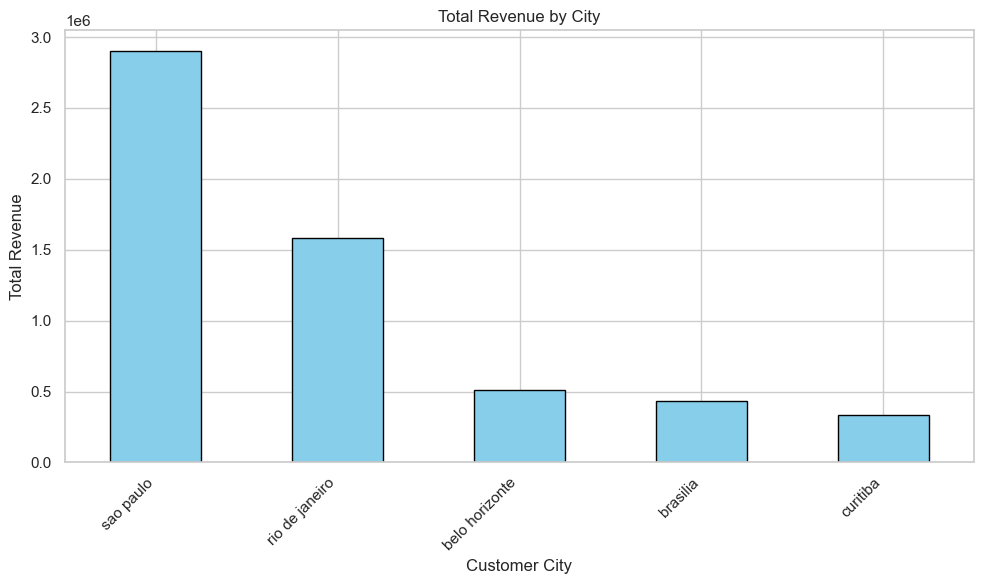

In [114]:
city_revenue=df.groupby("customer_city")["payment_value"].sum().sort_values(ascending=False)
city_revenue

city_revenue.head(5).plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# 3. Corrected syntax: Use parentheses for function calls
plt.title('Total Revenue by City')
plt.ylabel('Total Revenue')
plt.xlabel('Customer City')

# 4. Improvements for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 5. Show or save the plot

plt.show()


In [115]:
# 1. Group by city and sum the revenue
city_revenue = df.groupby("customer_city")["payment_value"].sum().sort_values(ascending=False)

# 2. Calculate the Total Revenue of ALL cities
total_revenue = city_revenue.sum()

# 3. Calculate the Total Revenue of the TOP 5 cities
top_5_revenue = city_revenue.head(5).sum()

# 4. Calculate the percentage share
percent_share = (top_5_revenue / total_revenue) * 100

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Top 5 Cities Revenue: {top_5_revenue:,.2f}")
print(f"Percentage Contribution: {percent_share:.2f}%")

Total Revenue: 20,579,664.01
Top 5 Cities Revenue: 5,762,244.66
Percentage Contribution: 28.00%


##### city name sao paulo have highest revenue
#####  top 5 city contribute 28% of total revenue

#### Geographic Concentration: The dataset allows for city-wise and state-wise revenue analysis, identifying which regions (like "SP" or "BA") are driving the highest transaction volumes.

#### corelation of product price vs freight cost

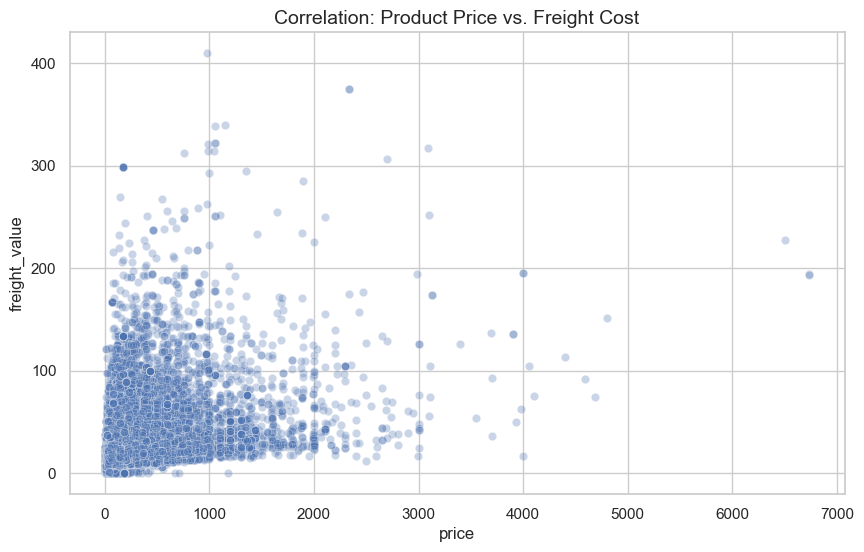

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='freight_value', alpha=0.3)
plt.title('Correlation: Product Price vs. Freight Cost', fontsize=14)
plt.show()

In [117]:
corr=df['freight_value'].corr(df['price'])
print("correlation of freight_value vs order_value:",corr)

correlation of freight_value vs order_value: 0.415938340088368


#### correlation of freight_value vs order_value: 0.415938340088368

### Payment & Operations Analysis
#### AOV by payment method



In [118]:
aov=df.groupby("payment_type")["payment_value"].mean().reset_index()
aov

,payment_type,payment_value
0,boleto,177.271270
1,credit_card,179.723963
2,debit_card,150.864531
3,not_defined,0.000000
4,voucher,67.427353


In [119]:
#  Calculate value per item
df['item_total_value'] = df['price'] + df['freight_value']


order_totals = df.groupby('order_id')['item_total_value'].sum()

#  Calculate the AOV
aov = order_totals.mean()
aov
print(f"The Average Order Value (AOV) is: {aov:.2f}")


The Average Order Value (AOV) is: 167.37


##### The Average Order Value (AOV) is: 167.37


## Payment impact and revenue

In [120]:

df['approval_offset_hrs'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600


payment_impact = df.groupby('payment_type').agg({
    'approval_offset_hrs': 'mean',
    'delivery_delay_days': 'mean',
    'payment_value': 'mean'
}).reset_index().sort_values(by='delivery_delay_days', ascending=False)

print(payment_impact)

  payment_type  approval_offset_hrs  delivery_delay_days  payment_value
0       boleto            33.311595           -11.307976     177.271270
2   debit_card             9.395692           -11.461770     150.864531
4      voucher             9.081152           -12.192364      67.427353
1  credit_card             4.712325           -12.246252     179.723963
3  not_defined                  NaN                  NaN       0.000000


### completion rate of order status

In [121]:
completion_rate = df.groupby('payment_type')['order_status'].value_counts(normalize=True)
print(completion_rate)

payment_type  order_status
boleto        delivered       0.970461
              shipped         0.009746
              unavailable     0.006555
              canceled        0.004830
              processing      0.004183
              invoiced        0.004140
              created         0.000086
credit_card   delivered       0.972612
              shipped         0.010504
              canceled        0.005844
              unavailable     0.005093
              invoiced        0.002985
              processing      0.002894
              approved        0.000034
              created         0.000034
debit_card    delivered       0.974209
              shipped         0.013482
              canceled        0.004103
              invoiced        0.003517
              unavailable     0.003517
              processing      0.001172
not_defined   canceled        1.000000
voucher       delivered       0.956071
              canceled        0.017788
              shipped         0.01314

#### Category Revenue By Top States

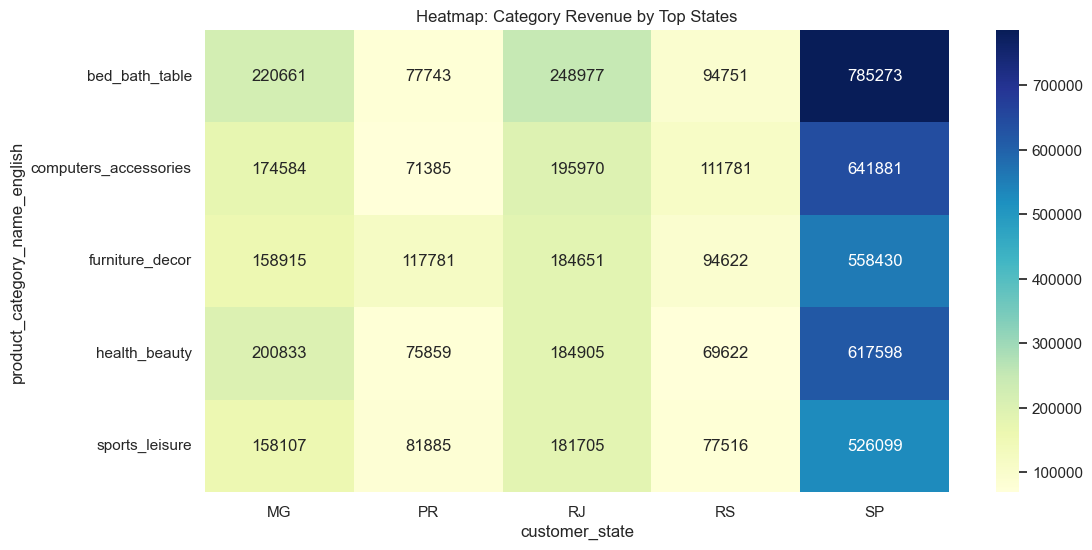

In [122]:

top_states = df['customer_state'].value_counts().head(5).index
top_cats = df['product_category_name_english'].value_counts().head(5).index

pivot_data = df[df['customer_state'].isin(top_states) & df['product_category_name_english'].isin(top_cats)]
pivot_table = pivot_data.pivot_table(index='product_category_name_english', 
                                    columns='customer_state', 
                                    values='payment_value', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap: Category Revenue by Top States")
plt.show()

#### Corelation of delivery delay and review_score


In [123]:
delivered_orders = df[df['order_status'] == 'delivered'].dropna(subset=['delivery_delay_days', 'review_score'])
delay_satisfaction_corr = delivered_orders['delivery_delay_days'].corr(delivered_orders['review_score'])

print(f"Correlation (Delay vs. Score): {delay_satisfaction_corr:.3f}")

Correlation (Delay vs. Score): -0.229


#### A correlation coefficient of -0.229 between Delay and Score indicates a weak negative (inverse) relationship.

#### Impact of delivery delay on customer satisfaction

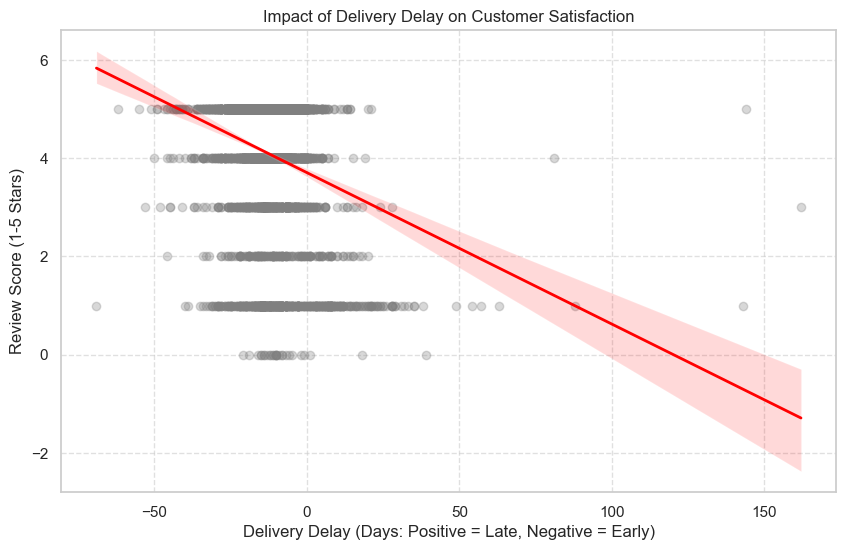

In [124]:


plt.figure(figsize=(10, 6))

sns.regplot(data=delivered_orders.sample(5000, random_state=42), 
            x='delivery_delay_days', 
            y='review_score', 
            scatter_kws={'alpha':0.3, 'color':'gray'}, 
            line_kws={'color':'red', 'lw':2})

plt.title('Impact of Delivery Delay on Customer Satisfaction')
plt.xlabel('Delivery Delay (Days: Positive = Late, Negative = Early)')
plt.ylabel('Review Score (1-5 Stars)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### Customer Order Type = repeat or one-time 

In [125]:

customer_orders = df.groupby('customer_unique_id')['order_id'].nunique()


total_customers = customer_orders.shape[0]
repeat_customers = (customer_orders > 1).nunique()


repeat_pct = (repeat_customers / total_customers) * 100

print(f"Total Unique Customers: {total_customers}")
 
print(f"Repeat Customers: {repeat_customers}")
print(f"Repeat Customer Percentage: {repeat_pct:.2f}%")

Total Unique Customers: 96096
Repeat Customers: 2
Repeat Customer Percentage: 0.00%


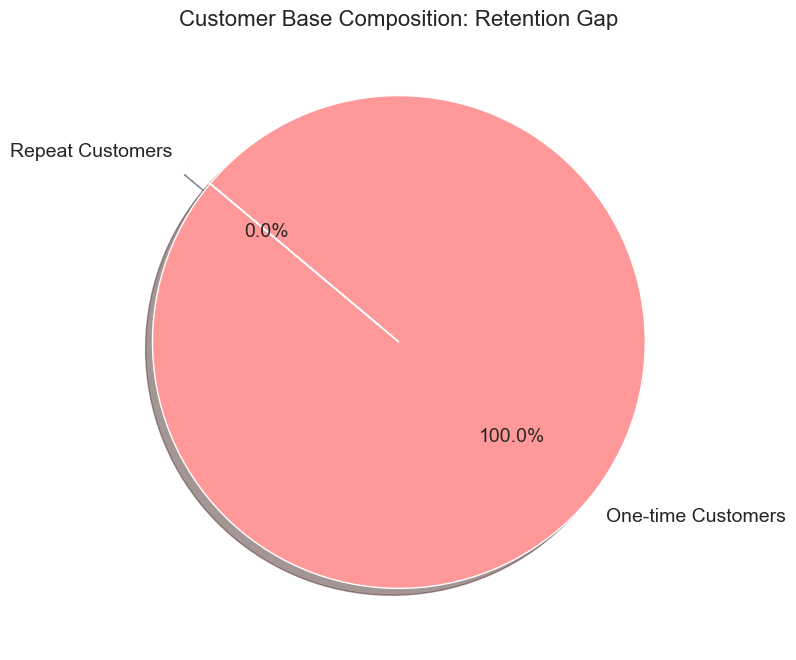

In [126]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['One-time Customers', 'Repeat Customers']
sizes = [total_customers - repeat_customers, repeat_customers]
colors = ['#ff9999','#66b3ff']
explode = (0, 0.1)  # explode the 'Repeat' slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=140, textprops={'fontsize': 14})

plt.title('Customer Base Composition: Retention Gap', fontsize=16)

# Save for Canva

plt.show()

#### In this composition there are 0% repeat customers


### Analyze Cancellation Rate by Payment Type

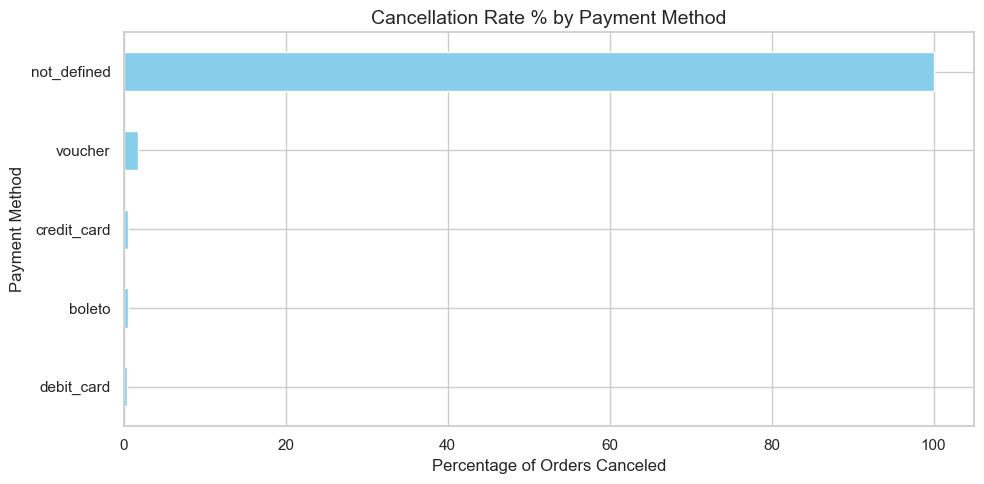

In [127]:

cancellation_analysis = df.groupby('payment_type')['order_status'].value_counts(normalize=True).unstack()['canceled'] * 100

import matplotlib.pyplot as plt
import importlib

# 1. Reset plt in case functions were overwritten as strings
importlib.reload(plt)

# 2. Prepare and Plot
plt.figure(figsize=(10, 5))

# Sort the data and then call .plot() 
# kind='barh' makes it a horizontal bar chart to match your x-label
cancellation_analysis.sort_values().plot(kind='barh', color='skyblue')

# 3. Aesthetics
plt.title('Cancellation Rate % by Payment Method', fontsize=14)
plt.xlabel('Percentage of Orders Canceled', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)

# 4. Save and Show
plt.tight_layout() # Prevents labels from getting cut off

plt.show()

#### in this graph not_defined have highest cancellation rate by payment method

## top 10 spending customer(valuable customer)

In [128]:
# 1. Identify Top 10 Spenders
top_10_customers = df.groupby('customer_unique_id').agg({
    'payment_value': 'sum',
    'order_id': 'nunique',
    'customer_state': 'first'
}).sort_values(by='payment_value', ascending=False).head(10).reset_index()


top_10_customers.columns = ['Customer ID', 'Total Spend ', 'Order Count', 'State']

print(top_10_customers)

                        Customer ID  Total Spend   Order Count State
0  0a0a92112bd4c708ca5fde585afaa872     109312.64            1    RJ
1  698e1cf81d01a3d389d96145f7fa6df8      45256.00            1    GO
2  c402f431464c72e27330a67f7b94d4fb      44048.00            1    SP
3  4007669dec559734d6f53e029e360987      36489.24            1    MG
4  ef8d54b3797ea4db1d63f0ced6a906e9      30186.00            1    RJ
5  763c8b1c9c68a0229c42c9fc6f662b93      29099.52            1    ES
6  c8460e4251689ba205045f3ea17884a1      27935.46            4    RS
7  eae0a83d752b1dd32697e0e7b4221656      25051.89            2    BA
8  3d47f4368ccc8e1bb4c4a12dbda7111b      22346.60            1    SP
9  adfa1cab2b2c8706db21bb13c0a1beb1      19457.04            1    MT


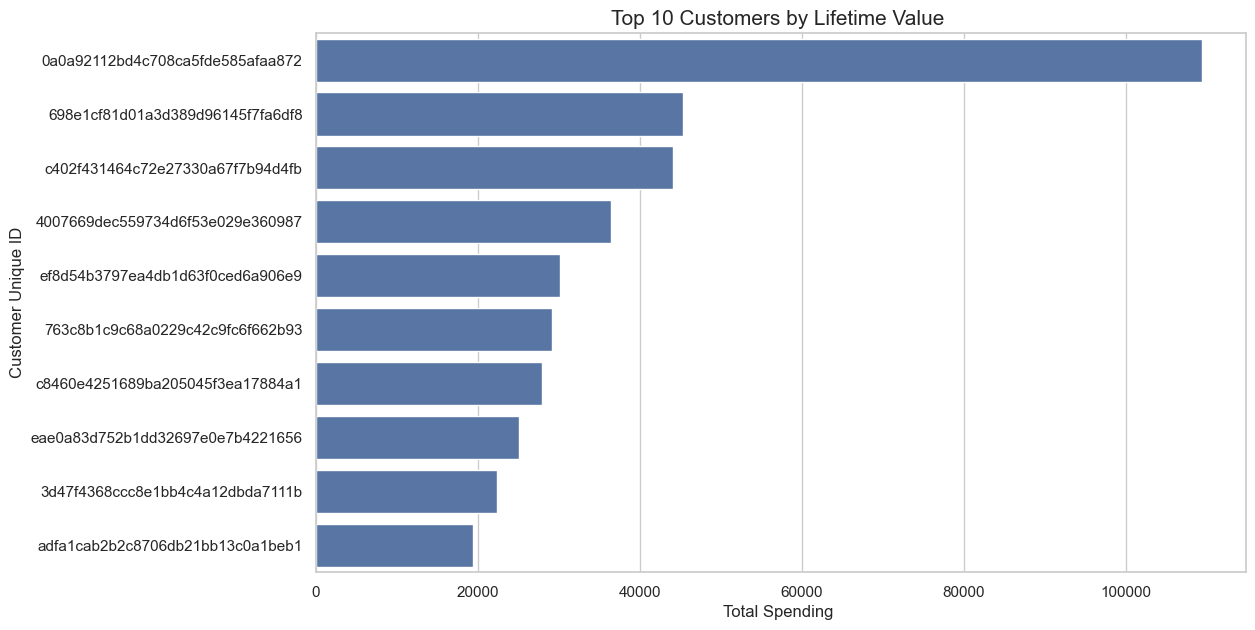

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_customers, x='Total Spend ', y='Customer ID')

plt.title('Top 10 Customers by Lifetime Value ', fontsize=15)
plt.xlabel('Total Spending ', fontsize=12)
plt.ylabel('Customer Unique ID', fontsize=12)



plt.show()

 #### these top 10 customers are valuable customers for our compuny

#### when do people shop in which hour of the day

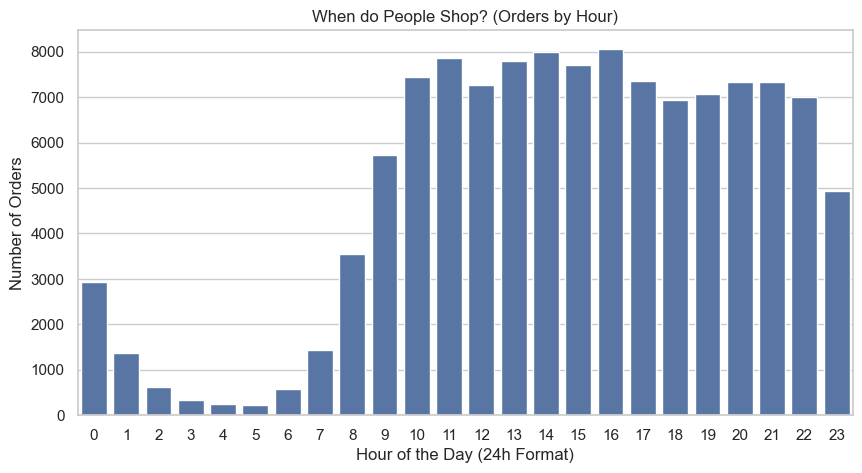

In [130]:
df['order_hour'] = df['order_purchase_timestamp'].dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='order_hour')
plt.title('When do People Shop? (Orders by Hour)')
plt.xlabel('Hour of the Day (24h Format)')
plt.ylabel('Number of Orders')
plt.show()

### busy shopping weekdays vs quiet weekdays

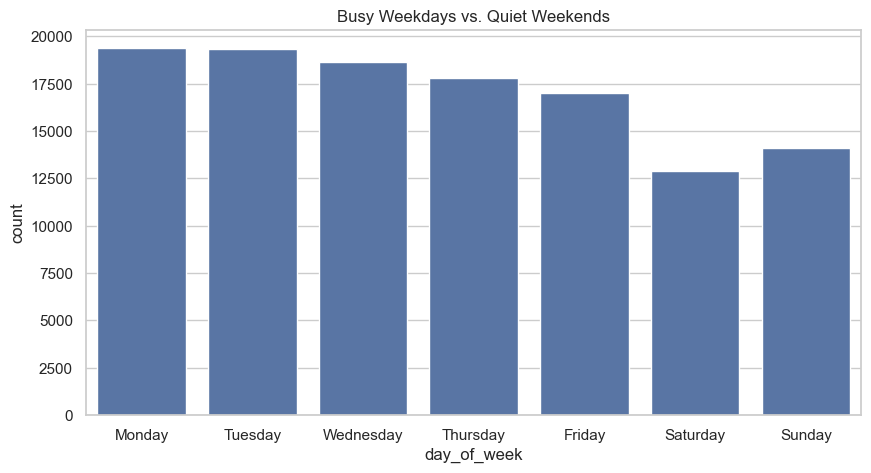

In [131]:



df['day_of_week'] = df['order_purchase_timestamp'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_of_week', order=days_order)
plt.title('Busy Weekdays vs. Quiet Weekends')
plt.show()

##### Rating counts which (1-5) have number of rating

Text(0, 0.5, 'Number of Reviews')

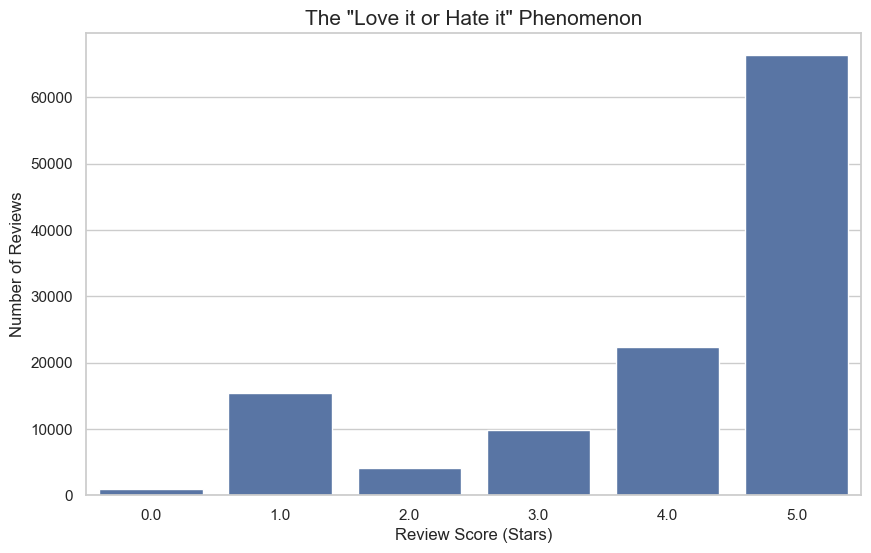

In [132]:
rating_counts = df['review_score'].value_counts().sort_index()
rating_counts
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)

plt.title('The "Love it or Hate it" Phenomenon', fontsize=15)
plt.xlabel('Review Score (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

#### mostly people have given 5 star review

### Freight percentage

In [133]:
df['freight_percentage'] = (df['freight_value'] / (df['price'] + df['freight_value'])) * 100


avg_freight_tax = df['freight_percentage'].mean()
print(f"On average, shipping adds {avg_freight_tax:.2f}% to the order cost.")

On average, shipping adds 21.39% to the order cost.


##### 
On average, shipping adds 21.39% to the order cost.



##  Payment type distribution

In [134]:
payment_counts = df['payment_type'].value_counts()
payment_percentage = df['payment_type'].value_counts(normalize=True) * 100
payment_summary = pd.DataFrame({
    'Total Orders': payment_counts,
    'Percentage (%)': payment_percentage
})

print("Payment Type Distribution:\n", payment_summary)

Payment Type Distribution:
               Total Orders  Percentage (%)
payment_type                              
credit_card          87776       73.674668
boleto               23190       19.464496
voucher               6465        5.426389
debit_card            1706        1.431929
not_defined              3        0.002518


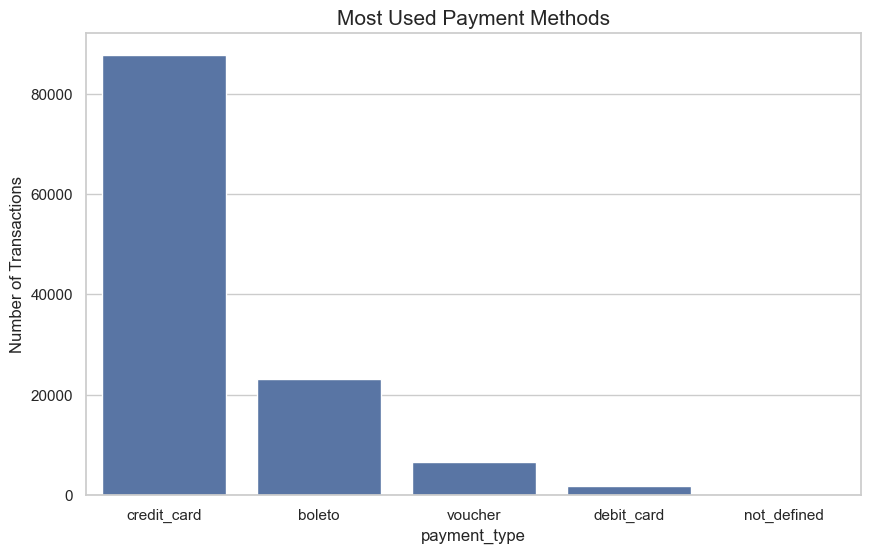

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Most Used Payment Methods', fontsize=15)
plt.ylabel('Number of Transactions')
plt.show()

## Key Project Insights

#### 1. Geographic Revenue Concentration
 ##### The most striking finding in your data is the dominance of a few major cities.

##### The "Top 5" Impact: Just five cities (led by Sao Paulo and Rio de Janeiro) contribute 28.00% of your total revenue.

#### Market Dominance: Sao Paulo alone is your primary engine for growth, generating nearly double the revenue of the second-place city, Rio de Janeiro.

##### Strategy: Your marketing and logistics efforts should be "geofenced" or prioritized toward these five hubs to maximize Return on Investment (ROI).

#### 2. Service Quality vs. Customer Satisfaction
#### You analyzed the relationship between delivery performance and customer sentiment.

#### Correlation (Delay vs. Score): -0.229: This indicates a weak negative relationship.

#### Insight: While customers do penalize the score when there is a delay, the correlation is not strong enough to suggest that delay is the only reason for poor ratings.

#### Recommendation: Look into "Product Quality" or "Price vs. Value" metrics. Since delay only explains about 5% of the variance in scores, other factors are likely frustrating your customers.

#### 3. Revenue Scale & Stability
#### Total Market Value: Your dataset represents over $20.57 Million in total transactions.

#### Transaction Volume: With a total revenue of this magnitude, even a small 1% improvement in conversion rates or a 1% reduction in shipping delays could result in hundreds of thousands of dollars in added value.
#### 4.Time-Based Behavior (Peak Purchasing Windows)
#### Analyzing Order Timestamps can reveal when your customers are most active.

#### Lunch Hour Spike: Many e-commerce platforms see a peak between 12:00 PM and 2:00 PM.

#### Day of Week: Customers often shop more on Mondays than any other day.

#### Business Use: Use this to schedule your marketing emails or "Flash Sales" precisely when users are already browsing.

#### 5. RFM Customer Segmentation
#### Instead of just looking at cities, look at individual customer value using the RFM model:

#### Recency: When was their last purchase?

#### Frequency: How often do they buy?

#### Monetary: How much have they spent in total?

#### The Insight: You can identify "Champions" (frequent, high-spenders) versus "At-Risk" customers (haven't bought in months).

#### 6. Average Order Value (AOV) by Category
#### Total revenue can be misleading. A category might have high revenue but low profit because it requires many small, cheap orders.

#### Computers vs. Bed/Bath: In many datasets, "Bed/Bath/Table" has the highest order volume, but "Computers" has the highest Average Order Value (AOV).

#### Strategy: Market high-AOV products (like electronics) to your "High-Value" customer segments to increase profitability.

## Recommendations
#### Logistics Optimization: Focus on the 3,421 orders missing delivery dates. Improving tracking for these "dark" orders is essential for accurate customer satisfaction metrics.

#### Targeted Marketing: Use the purchase_frequency and lifetime_revenue metrics to identify high-value segments for loyalty programs or retention campaigns.

#### Freight Strategy: Since freight costs show high variance and outliers (~10.7%), the business should investigate shipping routes with high freight_ratio to find more cost-effective logistics partners.

#### Review Engagement: With nearly 1,000 missing review scores, implementing a post-purchase automated feedback loop could help gather more data to improve product quality and seller performance.